In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd

import datetime
import glob
import numpy as np
import datetime

In [2]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [5]:
path_dir = os.getcwd() + "\\csse_covid_19_21\\"

In [6]:
# 디렉토리 내 파일 검색
# print(glob.glob(path_dir + "*"))

In [7]:
# 디렉토리 내 모든 파일 csv 한 df (frame)에 합치기
all_files = glob.glob(path_dir + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [8]:
frame.shape

(1092798, 14)

In [9]:
frame.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727.0,0.0,Afghanistan,0.000000,4.252222
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634.0,23501.0,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395.0,29740.0,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463.0,570.0,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146.0,6017.0,Angola,53.452981,2.305328


In [10]:
len(frame["Country_Region"].unique()) , frame["Country_Region"].unique()

(195,
 array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
        'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
        'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
        'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
        'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
        'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
        'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
        "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
        'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
        'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
        'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
        'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
        'Grenada

In [11]:
# 라스트 업데이트 인덱스로 바꾸기
# frame.set_index('Last_Update', inplace = True)
# frame.head()

In [12]:
sns.set(font_scale=1.5, style="whitegrid")

In [13]:
frame['Last_Update'] = pd.to_datetime(frame['Last_Update']).dt.date
frame

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02,33.939110,67.709953,52513,2201,41727.0,0.0,Afghanistan,0.000000,4.252222
1,NaN,NaN,NaN,Albania,2021-01-02,41.153300,20.168300,58316,1181,33634.0,23501.0,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02,28.033900,1.659600,99897,2762,67395.0,29740.0,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02,42.506300,1.521800,8117,84,7463.0,570.0,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02,-11.202700,17.873900,17568,405,11146.0,6017.0,Angola,53.452981,2.305328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092793,NaN,NaN,NaN,Vietnam,2021-10-01,14.058324,108.277199,790755,19301,NaN,NaN,Vietnam,812.375705,2.440832
1092794,NaN,NaN,NaN,West Bank and Gaza,2021-10-01,31.952200,35.233200,403716,4098,NaN,NaN,West Bank and Gaza,7913.802756,1.01507
1092795,NaN,NaN,NaN,Yemen,2021-10-01,15.552727,48.516388,9067,1721,NaN,NaN,Yemen,30.399684,18.98092
1092796,NaN,NaN,NaN,Zambia,2021-10-01,-13.133897,27.849332,209046,3648,NaN,NaN,Zambia,1137.111077,1.74507


In [14]:
# 날짜 인덱스화 하기
frame.set_index("Last_Update", inplace = True)
frame

,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
Last_Update,,,,,,,,,,,,,
2021-01-02,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,52513,2201,41727.0,0.0,Afghanistan,0.000000,4.252222
2021-01-02,NaN,NaN,NaN,Albania,41.153300,20.168300,58316,1181,33634.0,23501.0,Albania,2026.409062,2.025173
2021-01-02,NaN,NaN,NaN,Algeria,28.033900,1.659600,99897,2762,67395.0,29740.0,Algeria,227.809861,2.764848
2021-01-02,NaN,NaN,NaN,Andorra,42.506300,1.521800,8117,84,7463.0,570.0,Andorra,10505.403482,1.034865
2021-01-02,NaN,NaN,NaN,Angola,-11.202700,17.873900,17568,405,11146.0,6017.0,Angola,53.452981,2.305328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,NaN,NaN,NaN,Vietnam,14.058324,108.277199,790755,19301,NaN,NaN,Vietnam,812.375705,2.440832
2021-10-01,NaN,NaN,NaN,West Bank and Gaza,31.952200,35.233200,403716,4098,NaN,NaN,West Bank and Gaza,7913.802756,1.01507
2021-10-01,NaN,NaN,NaN,Yemen,15.552727,48.516388,9067,1721,NaN,NaN,Yemen,30.399684,18.98092


In [15]:
South_KR = frame.groupby("Country_Region").get_group("Korea, South")
South_KR.head()

,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
Last_Update,,,,,,,,,,,,,
2021-01-02,NaN,NaN,NaN,"Korea, South",35.907757,127.766922,62593,942,43578.0,18073.0,"Korea, South",122.086985,1.504961
2021-01-03,NaN,NaN,NaN,"Korea, South",35.907757,127.766922,63244,962,44507.0,17775.0,"Korea, South",123.356754,1.521093
2021-01-04,NaN,NaN,NaN,"Korea, South",35.907757,127.766922,64264,981,45240.0,18043.0,"Korea, South",125.346253,1.526516
2021-01-05,NaN,NaN,NaN,"Korea, South",35.907757,127.766922,64979,1007,46172.0,17800.0,"Korea, South",126.740853,1.549731
2021-01-06,NaN,NaN,NaN,"Korea, South",35.907757,127.766922,65818,1027,46995.0,17796.0,"Korea, South",128.377314,1.560363


In [16]:
South_KR["Confirmed"]

Last_Update
2021-01-02     62593
2021-01-03     63244
2021-01-04     64264
2021-01-05     64979
2021-01-06     65818
               ...  
2021-09-27    303553
2021-09-28    305842
2021-09-29    308725
2021-09-30    311289
2021-10-01    313773
Name: Confirmed, Length: 273, dtype: int64

In [17]:
South_KR_NC = South_KR["Confirmed"].diff()

In [18]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [19]:
def draw_lineplot(country, column_nm , new_ylabel, new_title, graph_color):
    # Create figure and plot space
    fig, ax = plt.subplots(figsize=(12, 12))

    # Add x-axis and y-axis
    ax.plot(country.index.values,
           country[column_nm],
           color= graph_color)

    # Set title and labels for axes
    ax.set(xlabel="날짜",
           ylabel= new_ylabel,
           title= new_title)

    date_form = DateFormatter("%m월")
    ax.xaxis.set_major_formatter(date_form)

    plt.show()

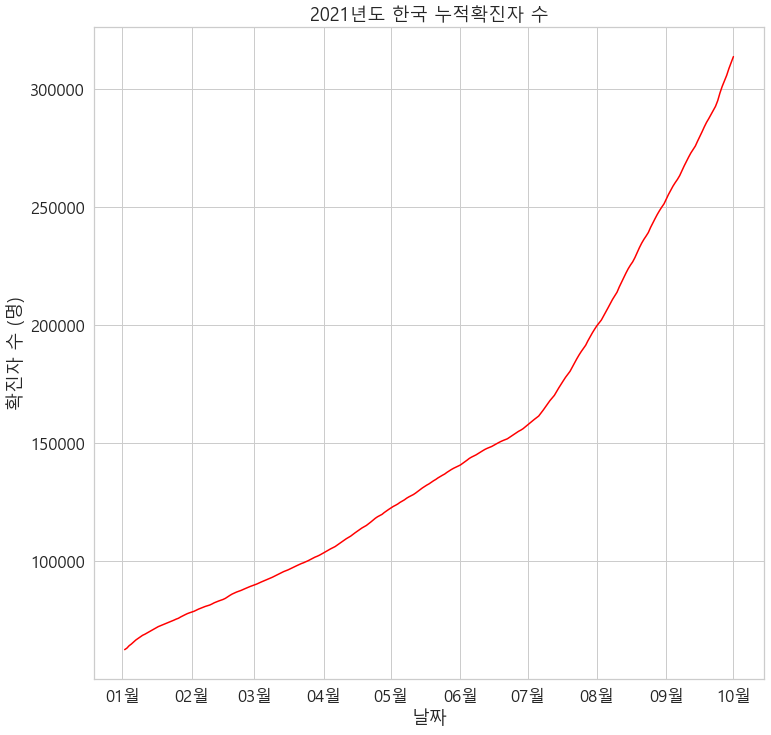

In [88]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(South_KR.index.values,
       South_KR["Confirmed"],
       color='red')

# Set title and labels for axes
ax.set(xlabel="날짜",
       ylabel="확진자 수 (명)",
       title="2021년도 한국 누적확진자 수")

date_form = DateFormatter("%m월")
ax.xaxis.set_major_formatter(date_form)

plt.show()

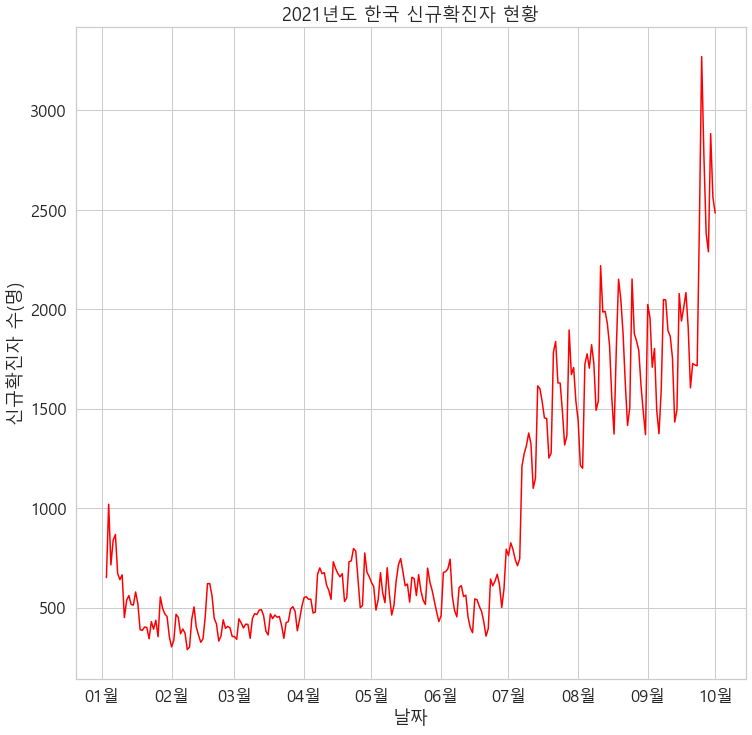

In [21]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(South_KR.index.values,
       South_KR_NC,
       color='red')

# Set title and labels for axes
ax.set(xlabel="날짜",
       ylabel="신규확진자 수(명)",
       title="2021년도 한국 신규확진자 현황")

date_form = DateFormatter("%m월")
ax.xaxis.set_major_formatter(date_form)

plt.show()

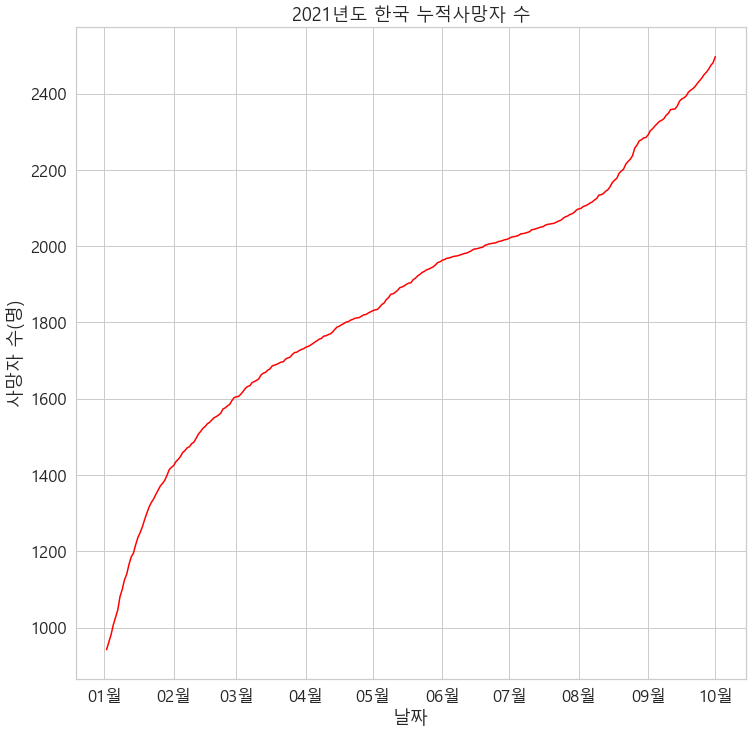

In [90]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(South_KR.index.values,
       South_KR["Deaths"],
       color='red')

# Set title and labels for axes
ax.set(xlabel="날짜",
       ylabel="사망자 수(명)",
       title="2021년도 한국 누적사망자 수")

date_form = DateFormatter("%m월")
ax.xaxis.set_major_formatter(date_form)

plt.show()

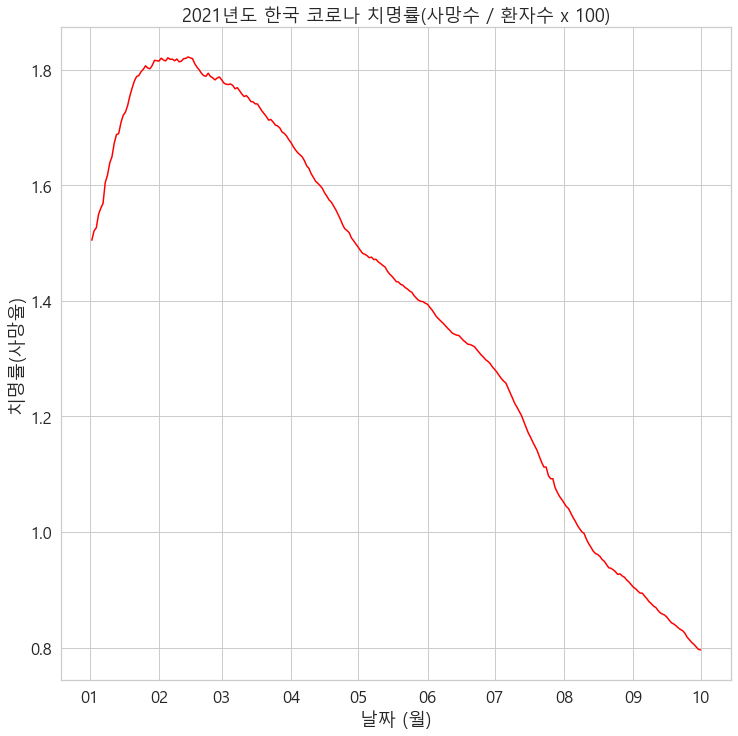

In [22]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(South_KR.index.values,
       South_KR["Case_Fatality_Ratio"],
       color='red')

# Set title and labels for axes
ax.set(xlabel="날짜 (월)",
       ylabel="치명률(사망율)",
       title="2021년도 한국 코로나 치명률(사망수 / 환자수 x 100)")

date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)

plt.show()

In [23]:
USA = frame.groupby("Country_Region").get_group("US")
USA.head()

,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
Last_Update,,,,,,,,,,,,,
2021-01-02,1001.0,Autauga,Alabama,US,32.539527,-86.644082,4239,50,0.0,4189.0,"Autauga, Alabama, US",7587.391935,1.179523
2021-01-02,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,13823,169,0.0,13654.0,"Baldwin, Alabama, US",6192.157109,1.2226
2021-01-02,1005.0,Barbour,Alabama,US,31.868263,-85.387129,1517,33,0.0,1484.0,"Barbour, Alabama, US",6145.183505,2.175346
2021-01-02,1007.0,Bibb,Alabama,US,32.996421,-87.125115,1854,46,0.0,1808.0,"Bibb, Alabama, US",8279.003304,2.481122
2021-01-02,1009.0,Blount,Alabama,US,33.982109,-86.567906,4693,63,0.0,4630.0,"Blount, Alabama, US",8115.726490,1.342425


In [24]:
USA.shape

(894622, 13)

In [25]:
def sum_of_dates(country):
    country = country.groupby(country.index.values).sum()
    country = country[country.index.values >= pd.Timestamp(2021,1,1)]
    return country

In [26]:
date_sorted_USA = USA.groupby(USA.index.values).sum()
date_sorted_USA = date_sorted_USA[date_sorted_USA.index.values >= pd.Timestamp(2021,1,1)]
date_sorted_USA

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate
2021-01-02,104740176.0,121545.488981,-292774.815314,20314608,354111,0.0,19778204.0,2.107664e+07
2021-01-03,104740176.0,121545.488981,-292774.815314,20611178,356668,0.0,20073297.0,2.138557e+07
2021-01-04,104740176.0,121545.488981,-292774.815314,20814248,358126,0.0,20282382.0,2.147012e+07
2021-01-05,104740176.0,121545.488981,-292774.815314,20996935,360220,0.0,20460956.0,2.160672e+07
2021-01-06,104769323.0,121585.849779,-292869.696644,21230394,363928,0.0,20688504.0,2.181817e+07
...,...,...,...,...,...,...,...,...
2021-09-27,105193514.0,121707.405039,-293182.487164,42931709,688478,0.0,0.0,4.285395e+07
2021-09-28,105193514.0,121707.405039,-293182.487164,43116725,690880,0.0,0.0,4.308743e+07
2021-09-29,105193514.0,121707.405039,-293182.487164,43226330,692917,0.0,0.0,4.324560e+07
2021-09-30,105193514.0,121707.405039,-293182.487164,43349597,695448,0.0,0.0,4.347992e+07


In [27]:
date_sorted_USA[date_sorted_USA.index.values >= pd.Timestamp(2021,6,1)]

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate
2021-06-01,108005188.0,125550.331969,-302393.115300,33542394,596517,0.0,0.0,3.287766e+07
2021-06-02,102311913.0,117864.478109,-283971.859027,33122050,592708,0.0,0.0,3.109644e+07
2021-06-03,105203562.0,121707.405039,-293182.487164,33360210,595497,0.0,0.0,3.201994e+07
2021-06-04,105203562.0,121707.405039,-293182.487164,33379401,596116,0.0,0.0,3.204179e+07
2021-06-05,105203562.0,121707.405039,-293182.487164,33396312,596643,0.0,0.0,3.206061e+07
...,...,...,...,...,...,...,...,...
2021-09-27,105193514.0,121707.405039,-293182.487164,42931709,688478,0.0,0.0,4.285395e+07
2021-09-28,105193514.0,121707.405039,-293182.487164,43116725,690880,0.0,0.0,4.308743e+07
2021-09-29,105193514.0,121707.405039,-293182.487164,43226330,692917,0.0,0.0,4.324560e+07
2021-09-30,105193514.0,121707.405039,-293182.487164,43349597,695448,0.0,0.0,4.347992e+07


In [28]:
date_sorted_USA_NC = date_sorted_USA["Confirmed"].diff()
date_sorted_USA_NC

2021-01-02         NaN
2021-01-03    296570.0
2021-01-04    203070.0
2021-01-05    182687.0
2021-01-06    233459.0
                ...   
2021-09-27     30958.0
2021-09-28    185016.0
2021-09-29    109605.0
2021-09-30    123267.0
2021-10-01    110594.0
Name: Confirmed, Length: 273, dtype: float64

In [29]:
date_sorted_USA_NC.loc[date_sorted_USA_NC < 0]

2021-06-02    -420344.0
2021-06-13   -4679954.0
2021-06-24   -1955937.0
2021-07-07    -426705.0
Name: Confirmed, dtype: float64

In [30]:
date_sorted_USA_NC

2021-01-02         NaN
2021-01-03    296570.0
2021-01-04    203070.0
2021-01-05    182687.0
2021-01-06    233459.0
                ...   
2021-09-27     30958.0
2021-09-28    185016.0
2021-09-29    109605.0
2021-09-30    123267.0
2021-10-01    110594.0
Name: Confirmed, Length: 273, dtype: float64

In [31]:
date_sorted_USA_ND = date_sorted_USA["Deaths"].diff()
date_sorted_USA_ND

2021-01-02       NaN
2021-01-03    2557.0
2021-01-04    1458.0
2021-01-05    2094.0
2021-01-06    3708.0
               ...  
2021-09-27     302.0
2021-09-28    2402.0
2021-09-29    2037.0
2021-09-30    2531.0
2021-10-01    2728.0
Name: Deaths, Length: 273, dtype: float64

In [32]:
date_sorted_USA_ND.loc[date_sorted_USA_ND < 0]

2021-06-02    -3809.0
2021-06-13   -74236.0
2021-06-24   -32927.0
2021-07-01    -2146.0
2021-07-07    -4183.0
Name: Deaths, dtype: float64

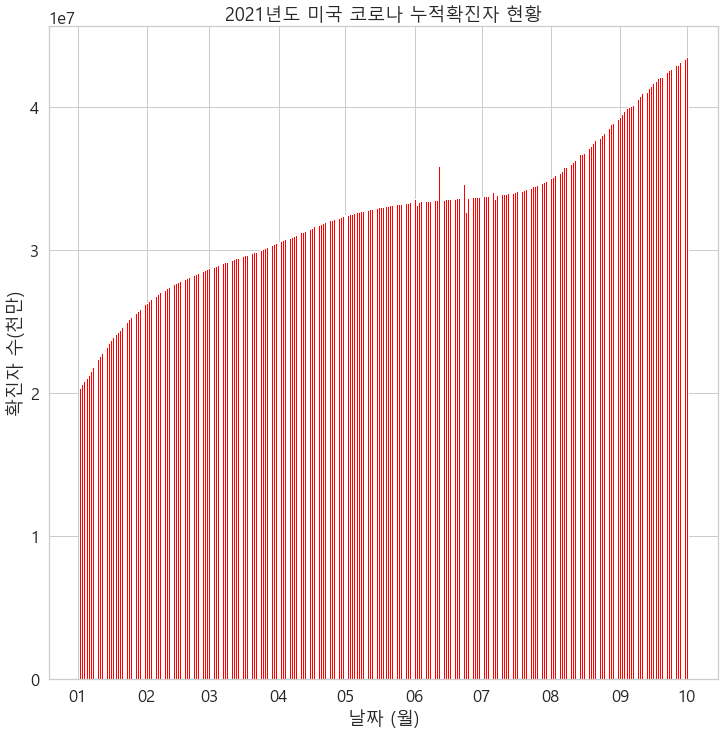

In [33]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(date_sorted_USA.index.values,
       date_sorted_USA["Confirmed"],
       color='red')

# Set title and labels for axes
ax.set(xlabel="날짜 (월)",
       ylabel="확진자 수(천만)",
       title="2021년도 미국 코로나 누적확진자 현황")

date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)

plt.show()

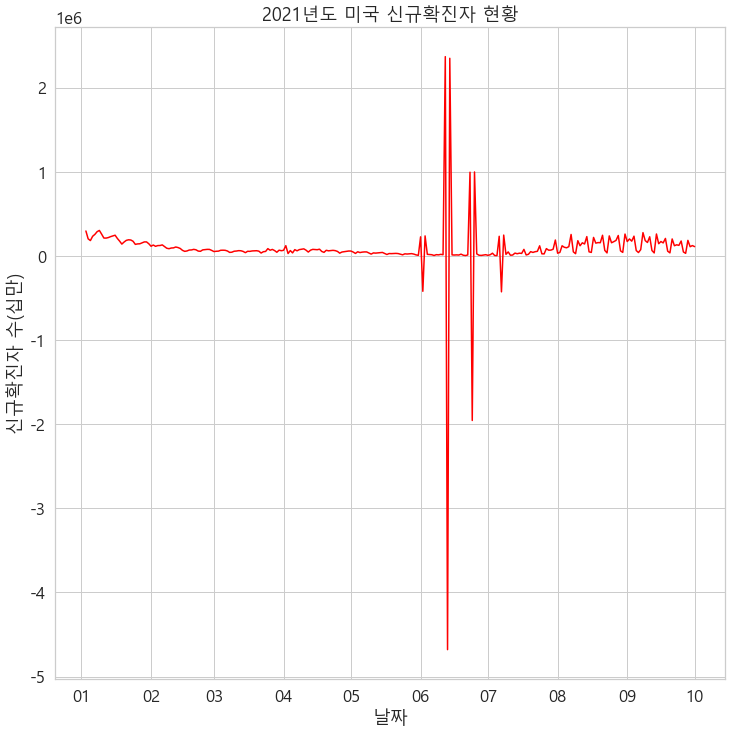

In [34]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(date_sorted_USA_NC.index.values,
       date_sorted_USA_NC,
       color='red')

# Set title and labels for axes
ax.set(xlabel="날짜",
       ylabel="신규확진자 수(십만)",
       title="2021년도 미국 신규확진자 현황")

date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)

plt.show()

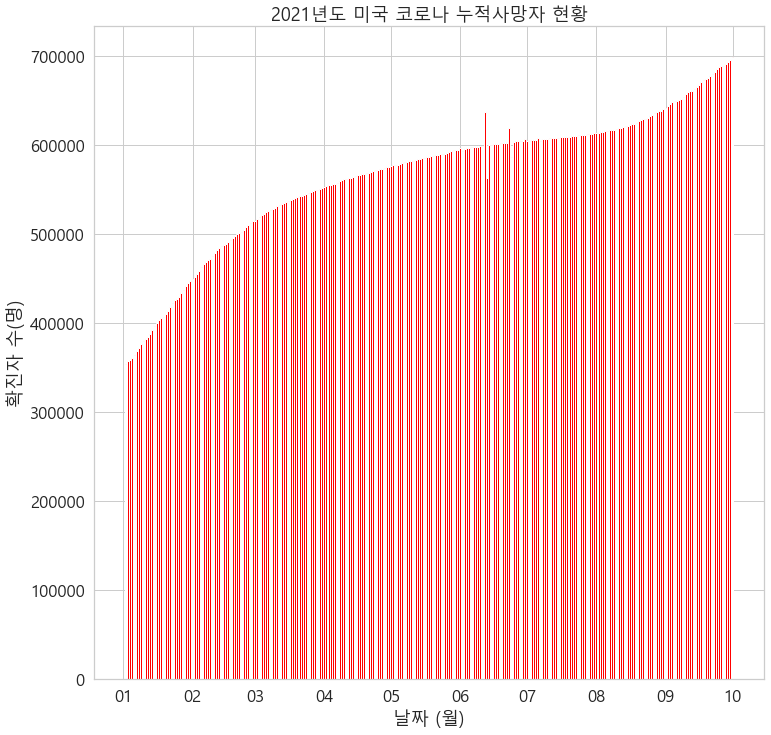

In [35]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(date_sorted_USA.index.values,
       date_sorted_USA["Deaths"],
       color='red')

# Set title and labels for axes
ax.set(xlabel="날짜 (월)",
       ylabel="확진자 수(명)",
       title="2021년도 미국 코로나 누적사망자 현황")

date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)

plt.show()

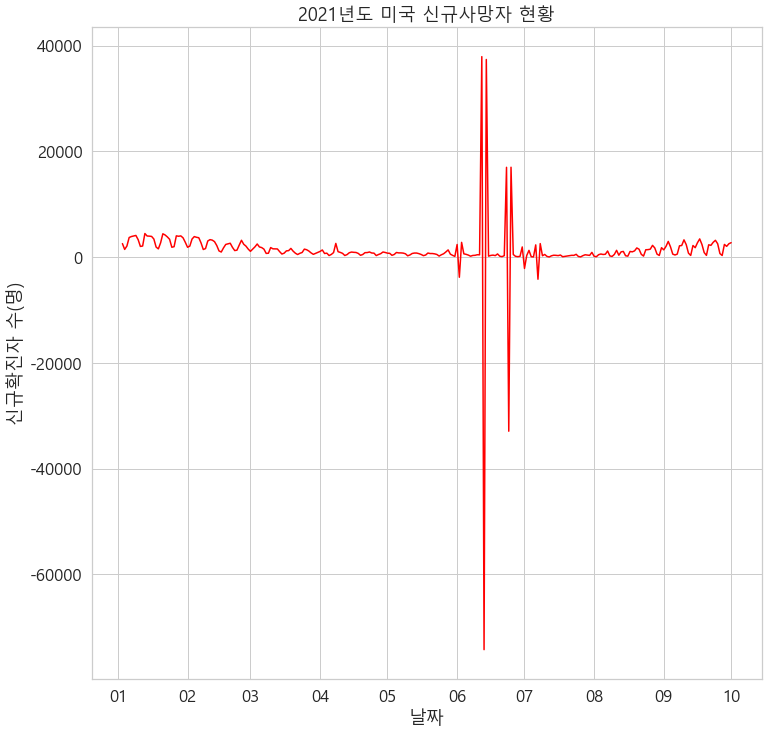

In [36]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(date_sorted_USA_ND.index.values,
       date_sorted_USA_ND,
       color='red')

# Set title and labels for axes
ax.set(xlabel="날짜",
       ylabel="신규확진자 수(명)",
       title="2021년도 미국 신규사망자 현황")

date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)

plt.show()

In [37]:
# date_sorted_USA_NC.drop(date_sorted_USA_NC.loc[date_sorted_USA_NC < 0].index, inplace=True)
# date_sorted_USA_NC.loc[date_sorted_USA_NC < 0]

In [38]:
# date_sorted_USA_ND.drop(date_sorted_USA_ND.loc[date_sorted_USA_ND < 0].index, inplace=True)
# date_sorted_USA_ND.loc[date_sorted_USA_ND < 0]

In [39]:
# # Create figure and plot space
# fig, ax = plt.subplots(figsize=(12, 12))

# # Add x-axis and y-axis
# ax.plot(date_sorted_USA_NC.index.values,
#        date_sorted_USA_NC,
#        color='red')

# # Set title and labels for axes
# ax.set(xlabel="날짜",
#        ylabel="신규확진자 수(십만)",
#        title="2021년도 미국 신규확진자 현황")

# date_form = DateFormatter("%m")
# ax.xaxis.set_major_formatter(date_form)

# plt.show()

In [40]:
# # Create figure and plot space
# fig, ax = plt.subplots(figsize=(12, 12))

# # Add x-axis and y-axis
# ax.plot(date_sorted_USA_ND.index.values,
#        date_sorted_USA_ND,
#        color='red')

# # Set title and labels for axes
# ax.set(xlabel="날짜",
#        ylabel="신규확진자 수(명)",
#        title="2021년도 미국 신규사망자 현황")

# date_form = DateFormatter("%m")
# ax.xaxis.set_major_formatter(date_form)

# plt.show()

In [41]:
US_confirmed = "time_series_covid19_confirmed_US.csv"
US_deaths = "time_series_covid19_deaths_US.csv"
US_folder = os.getcwd() + "\\US\\"

US_confirmed_df = pd.read_csv(US_folder + US_confirmed)
US_deaths_df = pd.read_csv(US_folder + US_deaths)

In [42]:
US_confirmed_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,9642,9652,9667,9691,9703,9715,9744,9761,9777,9780
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,36108,36201,36242,36278,36352,36409,36447,36491,36542,36579
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,3432,3465,3472,3474,3481,3483,3490,3495,3512,3519
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,4073,4085,4093,4102,4112,4126,4131,4146,4153,4157
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,9649,9693,9720,9735,9774,9797,9818,9842,9860,9870


In [43]:
US_confirmed_df_dt = US_confirmed_df.loc[:, "1/1/21":]
US_confirmed_df_dt


,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,...,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21
0,4239,4268,4305,4336,4546,4645,4705,4770,4847,4879,...,9642,9652,9667,9691,9703,9715,9744,9761,9777,9780
1,13823,13955,14064,14187,14440,14656,14845,15052,15202,15327,...,36108,36201,36242,36278,36352,36409,36447,36491,36542,36579
2,1517,1528,1530,1533,1575,1597,1614,1634,1648,1658,...,3432,3465,3472,3474,3481,3483,3490,3495,3512,3519
3,1854,1863,1882,1885,1923,1944,1981,2015,2038,2051,...,4073,4085,4093,4102,4112,4126,4131,4146,4153,4157
4,4693,4729,4746,4771,4849,4898,4957,5018,5047,5066,...,9649,9693,9720,9735,9774,9797,9818,9842,9860,9870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,2138,2145,2159,2199,2216,2239,2260,2346,2348,2353,...,4883,4883,4883,4899,4915,4926,4941,4943,4943,4943
3338,1558,1569,1570,1589,1597,1618,1668,1693,1693,1708,...,3422,3422,3422,3473,3484,3496,3520,3550,3550,3550
3339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3340,781,782,783,784,783,789,794,797,800,805,...,1267,1267,1267,1283,1310,1335,1368,1398,1398,1398


In [44]:
US_deaths_df_dt = US_deaths_df.loc[:, "1/1/21":]
US_deaths_df_dt

,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,...,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21
0,50,50,50,50,50,50,50,50,53,54,...,137,137,137,137,139,140,140,142,142,142
1,169,169,169,169,169,171,171,171,173,173,...,489,495,495,495,501,505,509,514,518,518
2,33,33,33,33,33,35,35,35,35,35,...,70,70,70,70,70,70,71,71,71,71
3,46,46,46,46,46,48,48,48,48,48,...,80,81,81,81,83,83,83,83,83,83
4,63,63,63,63,63,67,72,75,77,77,...,156,157,157,157,160,160,160,161,162,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,4,4,4,4,4,4,4,4,4,4,...,12,12,12,12,13,13,13,13,13,13
3338,7,7,7,7,7,7,8,8,8,8,...,23,23,23,23,25,25,25,25,25,25
3339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3340,19,19,19,19,21,21,21,21,21,21,...,27,27,27,27,27,27,27,27,27,27


In [45]:
US_confirmed_SR = US_confirmed_df_dt.sum()
US_deaths_SR = US_deaths_df_dt.sum()

In [46]:
US_deaths_SR

1/1/21     354137
1/2/21     356694
1/3/21     358152
1/4/21     360246
1/5/21     363936
            ...  
9/29/21    695451
9/30/21    698179
10/1/21    700285
10/2/21    700932
10/3/21    701169
Length: 276, dtype: int64

In [47]:
US_confirmed_SR

1/1/21     20318085
1/2/21     20614548
1/3/21     20817609
1/4/21     21000263
1/5/21     21231487
             ...   
9/29/21    43349749
9/30/21    43460343
10/1/21    43618627
10/2/21    43657833
10/3/21    43683048
Length: 276, dtype: int64

In [48]:
import datetime

format_str = '%m/%d/%y' # The format

new_index = []

for index in US_confirmed_SR.index.values:
    index = datetime.datetime.strptime(index, format_str)
    new_index.append(index.date())

US_confirmed_SR.index = new_index

In [49]:
import datetime

format_str = '%m/%d/%y' # The format

new_index = []

for index in US_deaths_SR.index.values:
    index = datetime.datetime.strptime(index, format_str)
    new_index.append(index.date())

US_deaths_SR.index = new_index

In [50]:
US_confirmed_SR

2021-01-01    20318085
2021-01-02    20614548
2021-01-03    20817609
2021-01-04    21000263
2021-01-05    21231487
                ...   
2021-09-29    43349749
2021-09-30    43460343
2021-10-01    43618627
2021-10-02    43657833
2021-10-03    43683048
Length: 276, dtype: int64

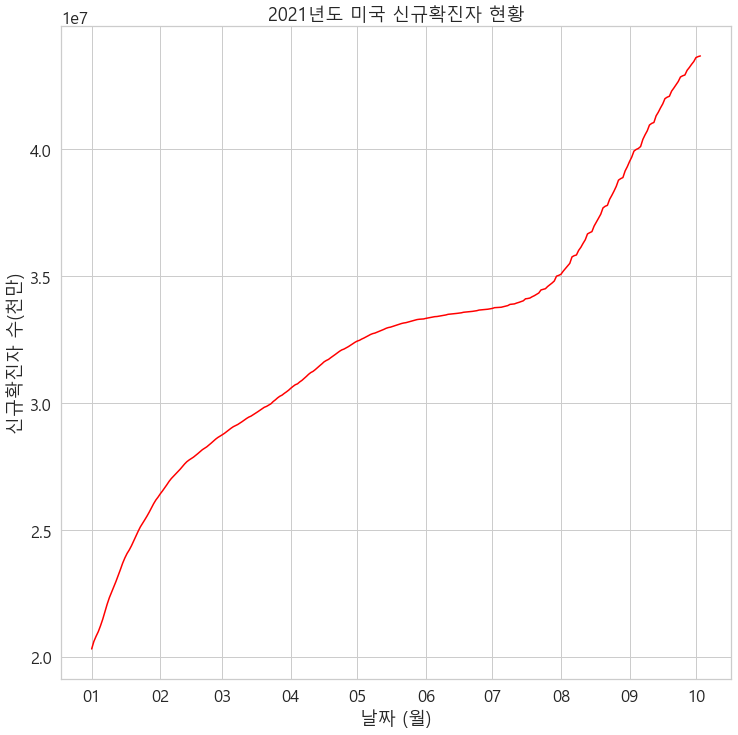

In [51]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(US_confirmed_SR,
       color='red')

# Set title and labels for axes
ax.set(xlabel="날짜 (월)",
       ylabel="신규확진자 수(천만)",
       title="2021년도 미국 신규확진자 현황")

date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)

plt.show()

In [52]:
US_confirmed_SR_N = US_confirmed_SR.diff()
US_confirmed_SR_N

2021-01-01         NaN
2021-01-02    296463.0
2021-01-03    203061.0
2021-01-04    182654.0
2021-01-05    231224.0
                ...   
2021-09-29    123267.0
2021-09-30    110594.0
2021-10-01    158284.0
2021-10-02     39206.0
2021-10-03     25215.0
Length: 276, dtype: float64

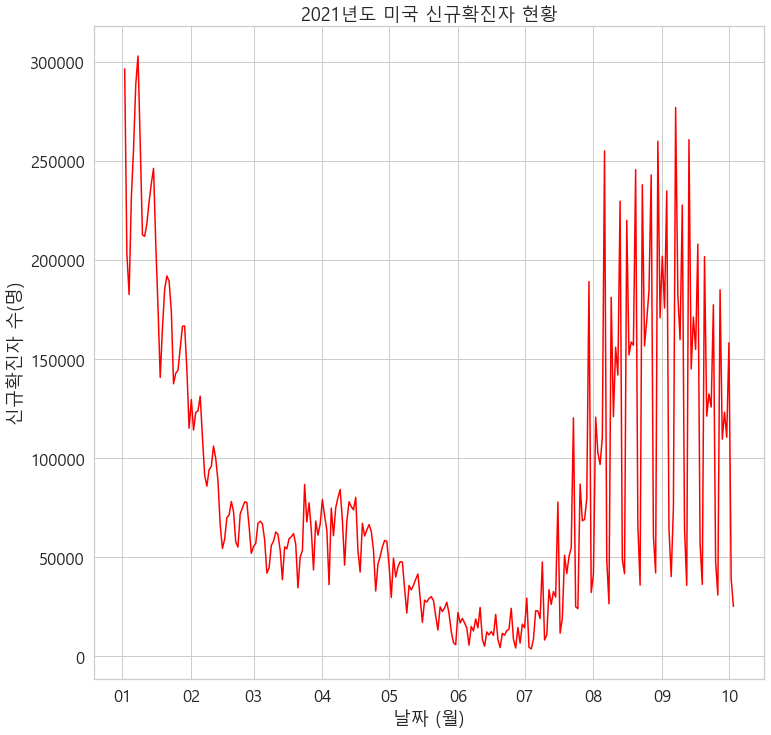

In [53]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(US_confirmed_SR_N,
       color='red')

# Set title and labels for axes
ax.set(xlabel="날짜 (월)",
       ylabel="신규확진자 수(명)",
       title="2021년도 미국 신규확진자 현황")

date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)

plt.show()

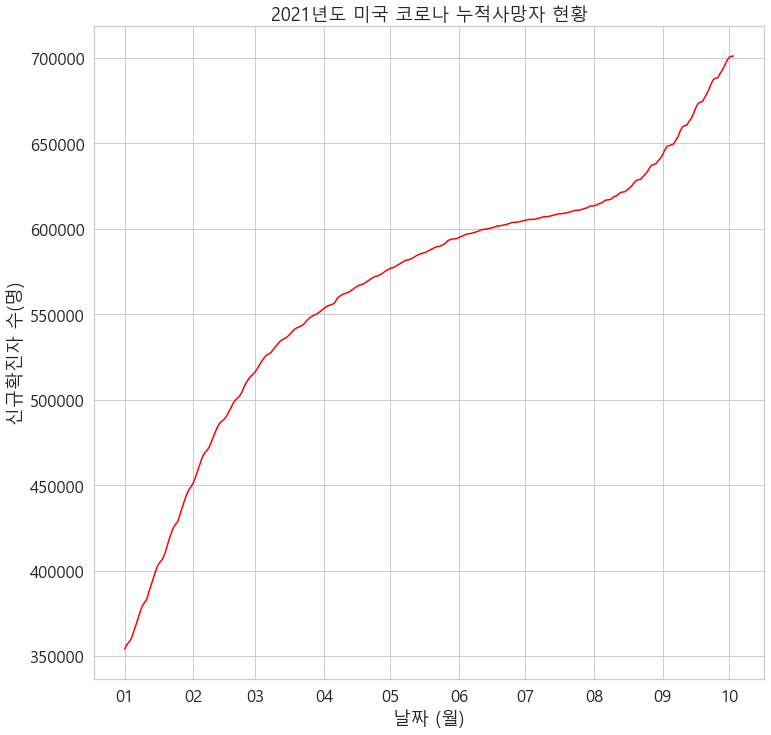

In [54]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(US_deaths_SR,
       color='red')

# Set title and labels for axes
ax.set(xlabel="날짜 (월)",
       ylabel="신규확진자 수(명)",
       title="2021년도 미국 코로나 누적사망자 현황")

date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)

plt.show()

In [55]:
US_deaths_SR_N = US_deaths_SR.diff()
US_deaths_SR_N

2021-01-01       NaN
2021-01-02    2557.0
2021-01-03    1458.0
2021-01-04    2094.0
2021-01-05    3690.0
               ...  
2021-09-29    2531.0
2021-09-30    2728.0
2021-10-01    2106.0
2021-10-02     647.0
2021-10-03     237.0
Length: 276, dtype: float64

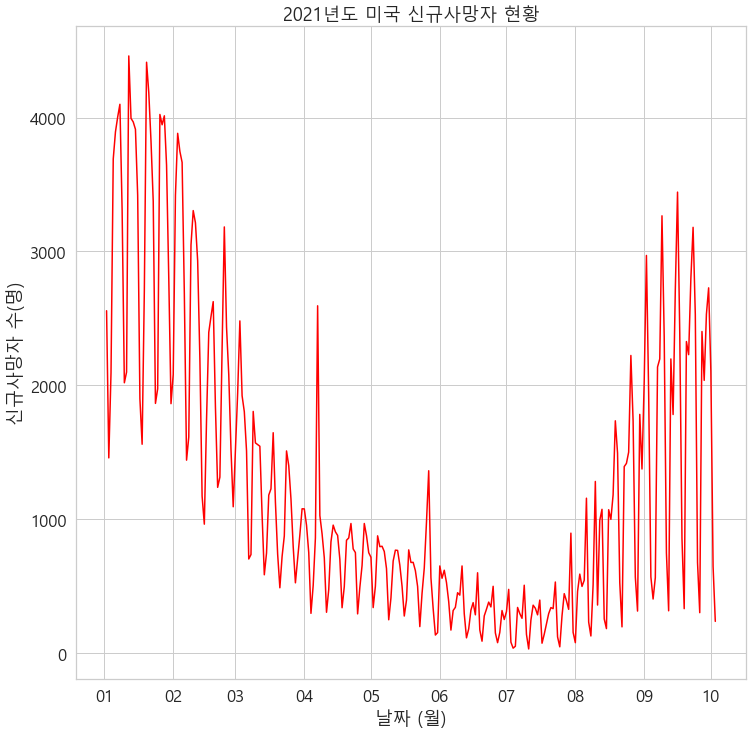

In [56]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(US_deaths_SR_N,
       color='red')

# Set title and labels for axes
ax.set(xlabel="날짜 (월)",
       ylabel="신규사망자 수(명)",
       title="2021년도 미국 신규사망자 현황")

date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)

plt.show()

In [57]:
# 이스라엘 영국 네덜란드 스웨덴 호주 - 한국
# 'Israel' , 'United Kingdom' , 'Netherlands' , 'Sweden' , 'Australia'

isl = frame.groupby("Country_Region").get_group('Israel')
uk = frame.groupby("Country_Region").get_group('United Kingdom')
nether = frame.groupby("Country_Region").get_group('Netherlands')
swd = frame.groupby("Country_Region").get_group('Sweden')
aust = frame.groupby("Country_Region").get_group('Australia')


In [58]:
# isl -> 도시국가 없음

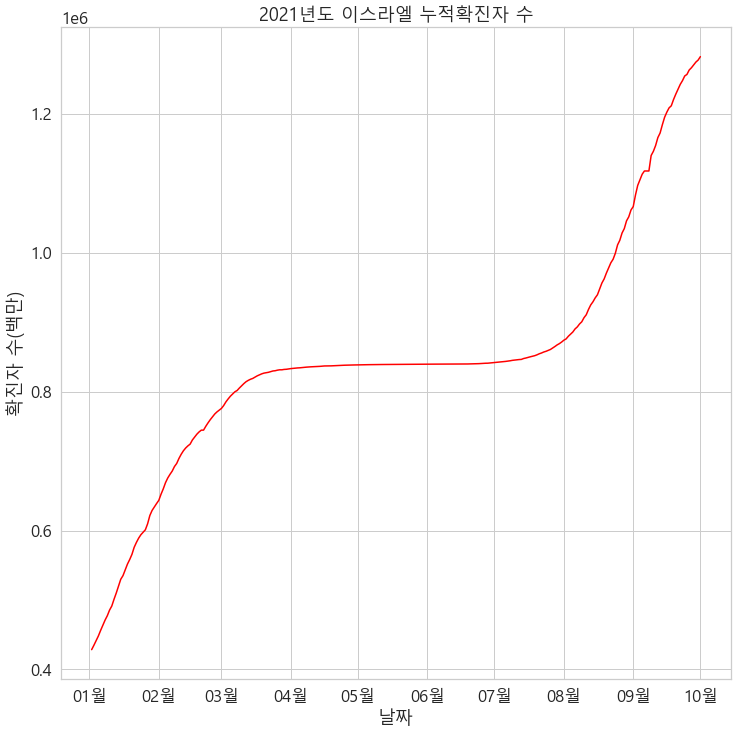

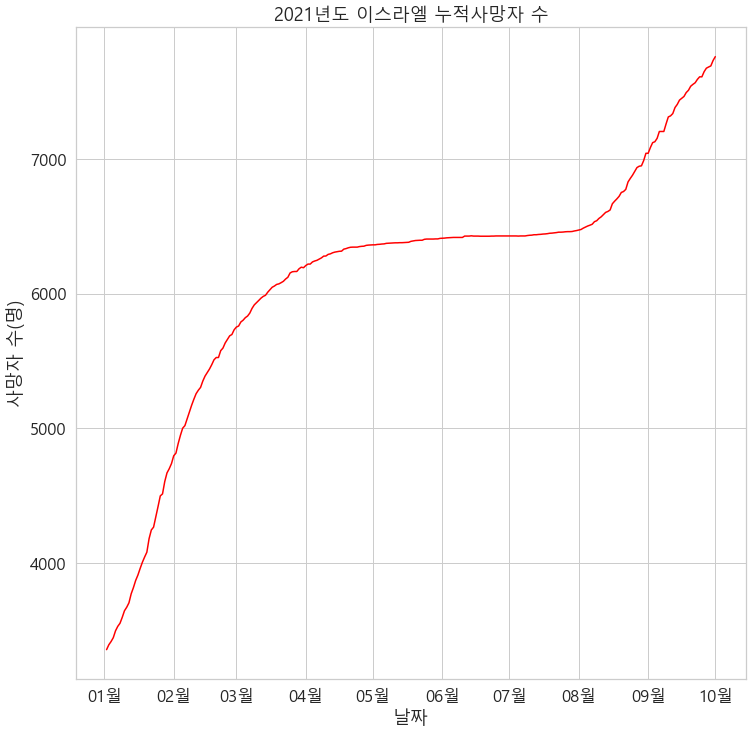

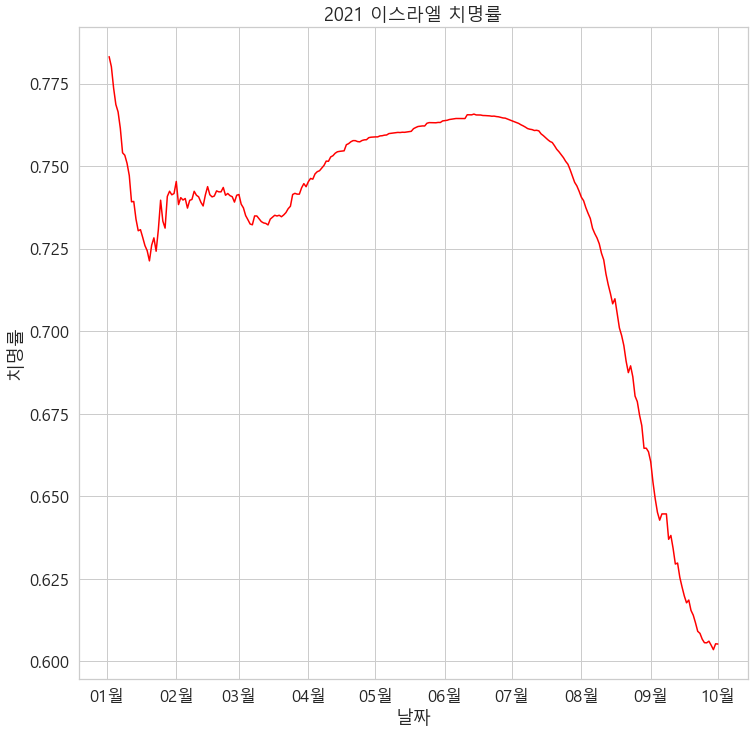

In [59]:
draw_lineplot(isl, "Confirmed" , "확진자 수(백만)", "2021년도 이스라엘 누적확진자 수", "red")
draw_lineplot(isl, "Deaths" , "사망자 수(명)", "2021년도 이스라엘 누적사망자 수", "red")
draw_lineplot(isl, "Case_Fatality_Ratio", "치명률", "2021 이스라엘 치명률", "red")

In [60]:
uk.head()

,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
Last_Update,,,,,,,,,,,,,
2021-01-02,NaN,NaN,Anguilla,United Kingdom,18.2206,-63.0686,13,0,12.0,1.0,"Anguilla, United Kingdom",86.655113,0.0
2021-01-02,NaN,NaN,Bermuda,United Kingdom,32.3078,-64.7505,604,10,445.0,149.0,"Bermuda, United Kingdom",969.922759,1.655629
2021-01-02,NaN,NaN,British Virgin Islands,United Kingdom,18.4207,-64.6400,86,1,74.0,11.0,"British Virgin Islands, United Kingdom",284.419751,1.162791
2021-01-02,NaN,NaN,Cayman Islands,United Kingdom,19.3133,-81.2546,338,2,294.0,42.0,"Cayman Islands, United Kingdom",514.303104,0.591716
2021-01-02,NaN,NaN,Channel Islands,United Kingdom,49.3723,-2.3644,3059,60,2445.0,554.0,"Channel Islands, United Kingdom",1794.145420,1.961425


In [61]:
uk['Case_Fatality_Ratio'] = uk['Case_Fatality_Ratio'].astype('float64')

<ipython-input-61-d734f2244313>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk['Case_Fatality_Ratio'] = uk['Case_Fatality_Ratio'].astype('float64')


In [62]:
uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4368 entries, 2021-01-02 to 2021-10-01
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 0 non-null      float64
 1   Admin2               0 non-null      object 
 2   Province_State       4368 non-null   object 
 3   Country_Region       4368 non-null   object 
 4   Lat                  4095 non-null   float64
 5   Long_                4095 non-null   float64
 6   Confirmed            4368 non-null   int64  
 7   Deaths               4368 non-null   int64  
 8   Recovered            3456 non-null   float64
 9   Active               3455 non-null   float64
 10  Combined_Key         4368 non-null   object 
 11  Incident_Rate        4040 non-null   float64
 12  Case_Fatality_Ratio  4040 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 477.8+ KB


In [63]:
uk.shape

(4368, 13)

In [64]:
mean_uk = uk.groupby(uk.index.values).mean()
mean_uk

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
2021-01-02,NaN,28.164647,-33.966498,159355.8125,4639.8125,355.1250,154360.8125,2068.130002,2.237674
2021-01-03,NaN,28.164647,-33.966498,162971.6250,4667.6250,359.1875,157944.7500,2121.844688,2.217769
2021-01-04,NaN,28.164647,-33.966498,166418.9375,4696.0625,381.0625,161341.7500,2171.841521,2.205521
2021-01-05,NaN,28.164647,-33.966498,170101.6250,4721.6875,391.4375,164988.4375,2217.046977,2.199444
2021-01-06,NaN,28.164647,-33.966498,173919.5625,4776.7500,399.1250,168743.6250,2268.004695,2.198624
...,...,...,...,...,...,...,...,...,...
2021-09-27,NaN,28.164647,-33.966498,481272.3750,8533.0625,NaN,NaN,7155.474681,1.084361
2021-09-28,NaN,28.164647,-33.966498,483621.3125,8535.5625,NaN,NaN,7210.700494,1.079800
2021-09-29,NaN,28.164647,-33.966498,485799.2500,8546.6250,NaN,NaN,7237.377869,1.087834
2021-09-30,NaN,28.164647,-33.966498,488003.3750,8556.6250,NaN,NaN,7282.749825,1.095521


In [65]:
mean_uk['Case_Fatality_Ratio']

2021-01-02    2.237674
2021-01-03    2.217769
2021-01-04    2.205521
2021-01-05    2.199444
2021-01-06    2.198624
                ...   
2021-09-27    1.084361
2021-09-28    1.079800
2021-09-29    1.087834
2021-09-30    1.095521
2021-10-01    1.087377
Name: Case_Fatality_Ratio, Length: 273, dtype: float64

In [71]:
mean_uk.loc[ mean_uk['Case_Fatality_Ratio'] < 0.7, :]

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
2021-03-14,NaN,2.674284,-20.123723,82060.75,2417.326923,232.557692,79410.865385,1027.614235,0.507029


In [91]:
uk[uk.index.values == pd.Timestamp(2021,3,14)]["Case_Fatality_Ratio"]

Last_Update
2021-03-14    0.000000
2021-03-14    1.632653
2021-03-14    0.653595
2021-03-14    0.427350
2021-03-14    2.127133
2021-03-14    2.965134
2021-03-14    0.000000
2021-03-14    2.205020
2021-03-14    2.106969
2021-03-14    5.000000
2021-03-14    1.828275
2021-03-14    0.000000
2021-03-14    3.591176
2021-03-14    0.681818
2021-03-14         NaN
2021-03-14    2.639339
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000
2021-03-14    0.000000

In [66]:
date_sorted_uk = sum_of_dates(uk)
date_sorted_uk

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
2021-01-02,0.0,422.469698,-509.497466,2549693,74237,5682.0,2469773.0,28953.820022,31.327440
2021-01-03,0.0,422.469698,-509.497466,2607546,74682,5747.0,2527116.0,29705.825627,31.048759
2021-01-04,0.0,422.469698,-509.497466,2662703,75137,6097.0,2581468.0,30405.781297,30.877288
2021-01-05,0.0,422.469698,-509.497466,2721626,75547,6263.0,2639815.0,31038.657681,30.792217
2021-01-06,0.0,422.469698,-509.497466,2782713,76428,6386.0,2699898.0,31752.065731,30.780732
...,...,...,...,...,...,...,...,...,...
2021-09-27,0.0,422.469698,-509.497466,7700358,136529,0.0,0.0,107332.120209,16.265418
2021-09-28,0.0,422.469698,-509.497466,7737941,136569,0.0,0.0,108160.507403,16.197006
2021-09-29,0.0,422.469698,-509.497466,7772788,136746,0.0,0.0,108560.668040,16.317506
2021-09-30,0.0,422.469698,-509.497466,7808054,136906,0.0,0.0,109241.247377,16.432811


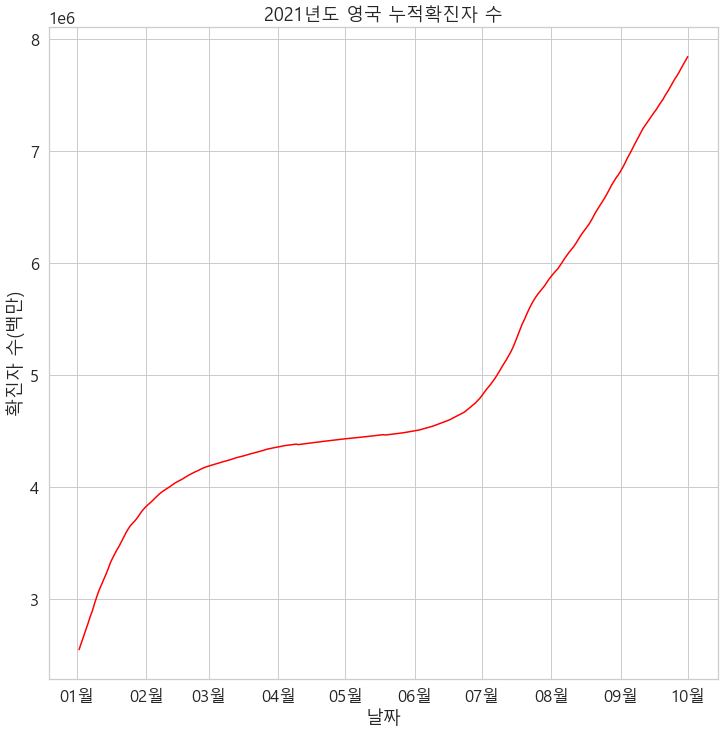

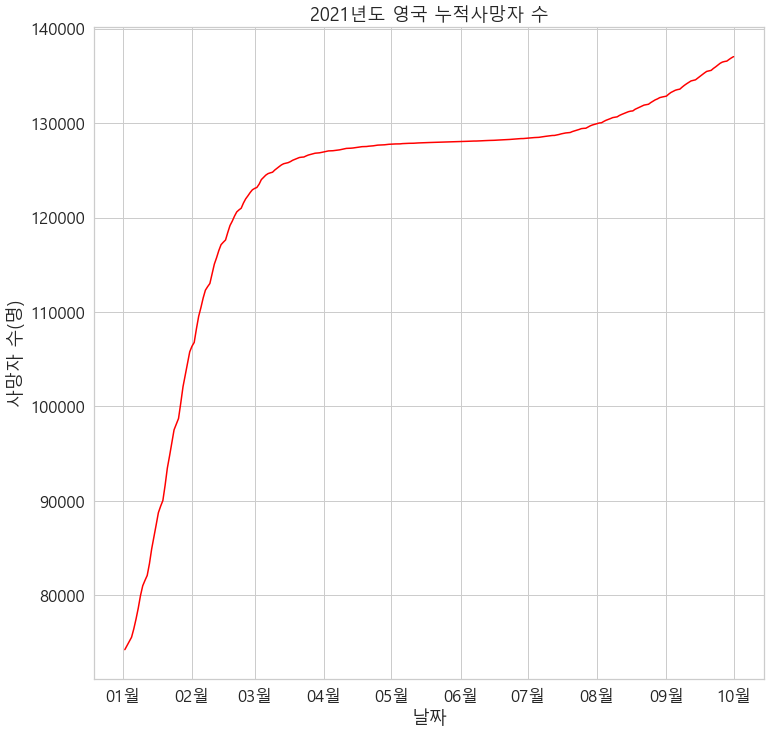

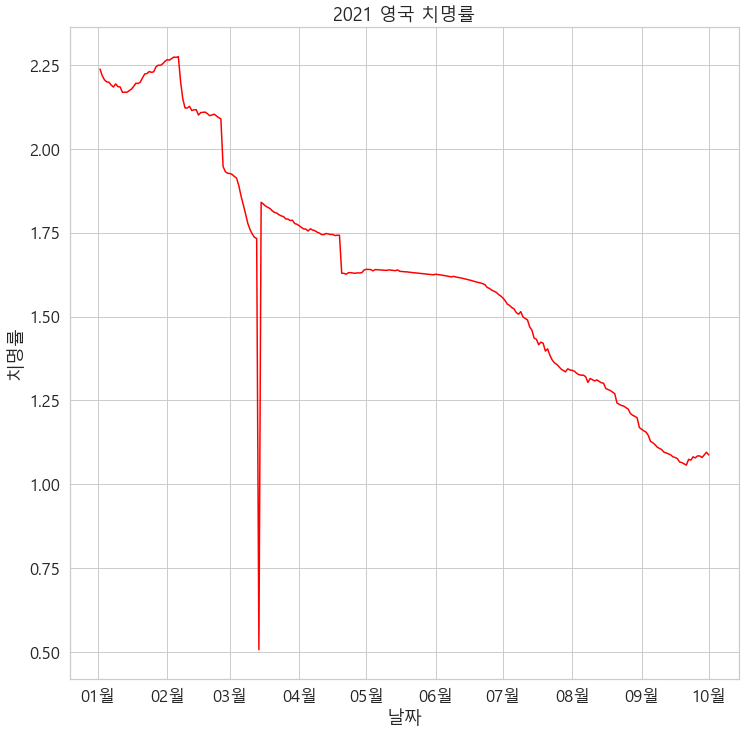

In [68]:
draw_lineplot(date_sorted_uk, "Confirmed" , "확진자 수(백만)", "2021년도 영국 누적확진자 수", "red")
draw_lineplot(date_sorted_uk, "Deaths" , "사망자 수(명)", "2021년도 영국 누적사망자 수", "red")
draw_lineplot(mean_uk, "Case_Fatality_Ratio", "치명률", "2021 영국 치명률", "red")

In [73]:
nether.head()

,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
Last_Update,,,,,,,,,,,,,
2021-01-02,NaN,NaN,Aruba,Netherlands,12.521100,-69.968300,5509,49,5179.0,281.0,"Aruba, Netherlands",5159.882360,0.889454
2021-01-02,NaN,NaN,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,196,3,180.0,13.0,"Bonaire, Sint Eustatius and Saba, Netherlands",747.492468,1.530612
2021-01-02,NaN,NaN,Curacao,Netherlands,12.169600,-68.990000,4289,16,2950.0,1323.0,"Curacao, Netherlands",2613.650213,0.373047
2021-01-02,NaN,NaN,Drenthe,Netherlands,52.862485,6.618435,13717,140,0.0,13577.0,"Drenthe, Netherlands",2778.509243,1.020631
2021-01-02,NaN,NaN,Flevoland,Netherlands,52.550383,5.515162,19702,157,0.0,19545.0,"Flevoland, Netherlands",4657.451994,0.796873


In [79]:
nether_sum = sum_of_dates(nether)
nether['Case_Fatality_Ratio'] = nether['Case_Fatality_Ratio'].astype('float64')
nether_mean = nether.groupby(nether.index.values).mean()

<ipython-input-79-446504113e9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nether['Case_Fatality_Ratio'] = nether['Case_Fatality_Ratio'].astype('float64')


In [80]:
nether_mean

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
2021-01-02,NaN,42.625549,-12.729885,48036.235294,683.764706,567.705882,46784.764706,3782.612547,1.239384
2021-01-03,NaN,42.625549,-12.729885,48544.058824,685.882353,570.235294,47287.941176,3822.302620,1.231486
2021-01-04,NaN,42.625549,-12.729885,48982.470588,688.647059,583.470588,47710.352941,3859.547307,1.225239
2021-01-05,NaN,42.625549,-12.729885,49371.529412,692.352941,591.058824,48088.117647,3892.169952,1.220862
2021-01-06,NaN,42.625549,-12.729885,49754.235294,701.294118,595.411765,48457.529412,3931.779545,1.223846
...,...,...,...,...,...,...,...,...,...
2021-09-27,NaN,42.625549,-12.729885,119677.588235,1091.588235,NaN,NaN,10506.418857,0.887239
2021-09-28,NaN,42.625549,-12.729885,119763.529412,1092.117647,NaN,NaN,10522.882096,0.890635
2021-09-29,NaN,42.625549,-12.729885,119870.529412,1092.647059,NaN,NaN,10542.351200,0.889314
2021-09-30,NaN,42.625549,-12.729885,119978.235294,1093.000000,NaN,NaN,10556.026594,0.888293


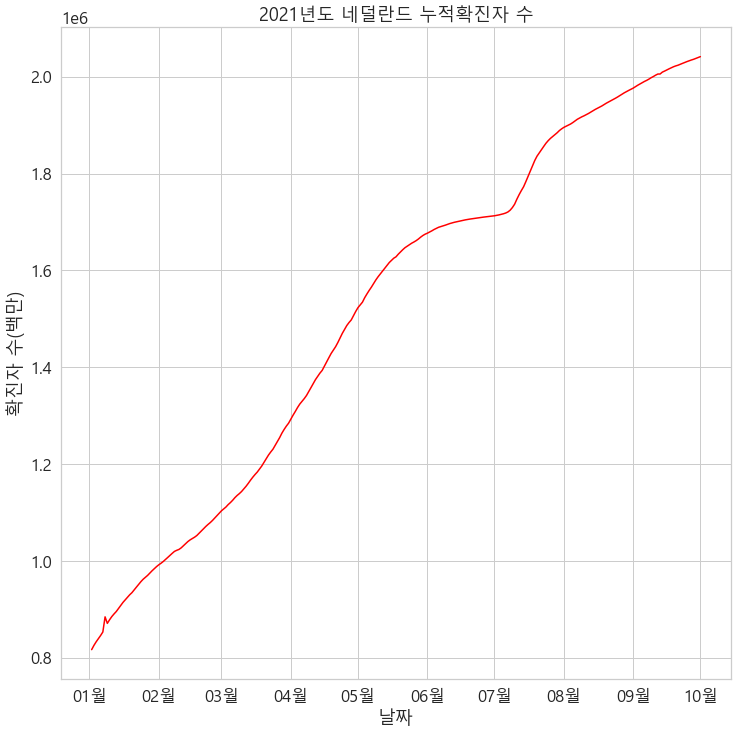

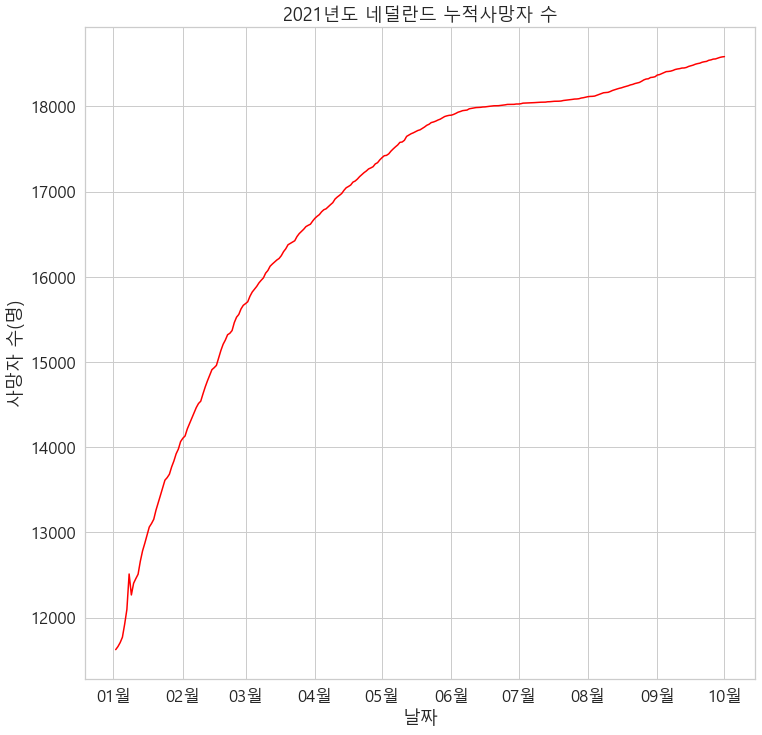

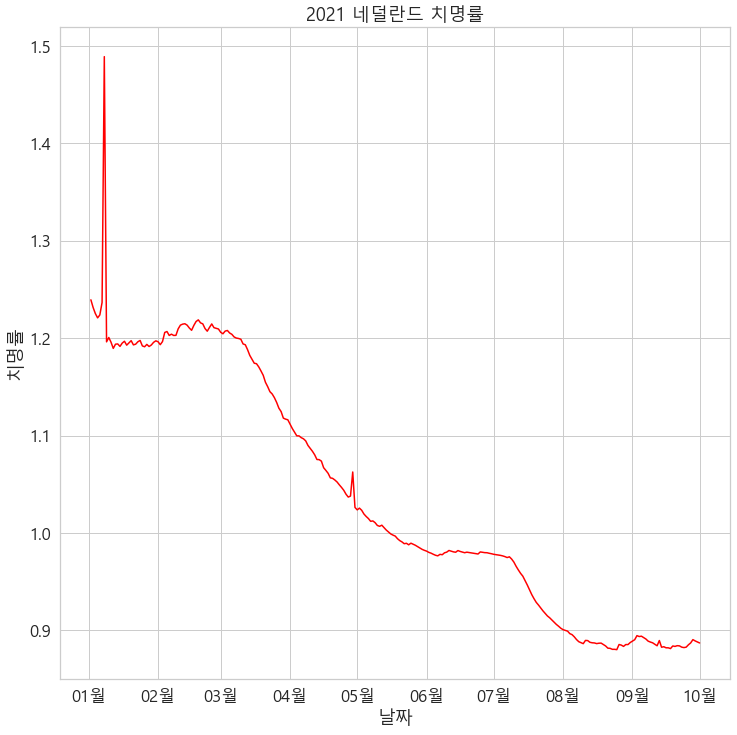

In [81]:
draw_lineplot(nether_sum, "Confirmed" , "확진자 수(백만)", "2021년도 네덜란드 누적확진자 수", "red")
draw_lineplot(nether_sum, "Deaths" , "사망자 수(명)", "2021년도 네덜란드 누적사망자 수", "red")
draw_lineplot(nether_mean, "Case_Fatality_Ratio", "치명률", "2021 네덜란드 치명률", "red")

<ipython-input-84-53c0e91627c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swd['Case_Fatality_Ratio'] = swd['Case_Fatality_Ratio'].astype('float64')


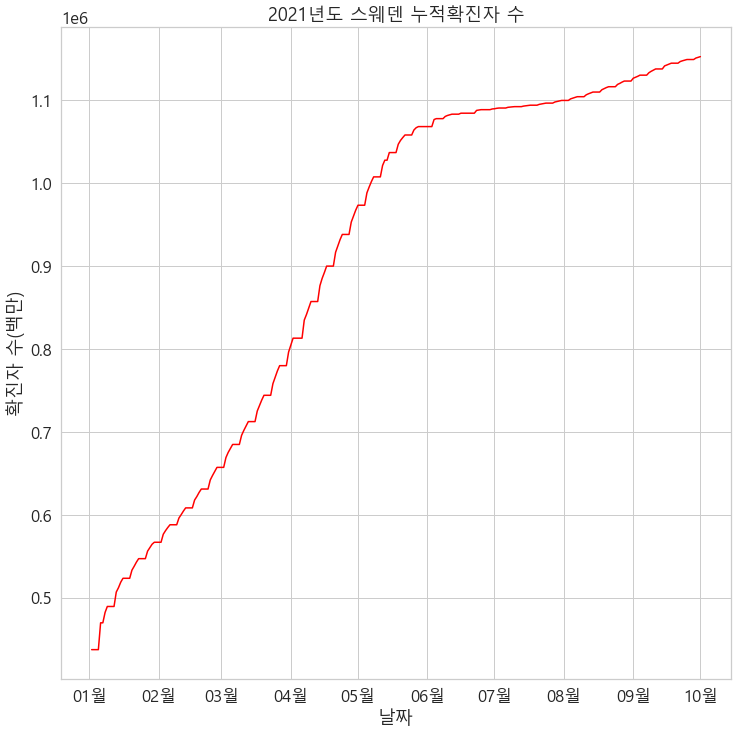

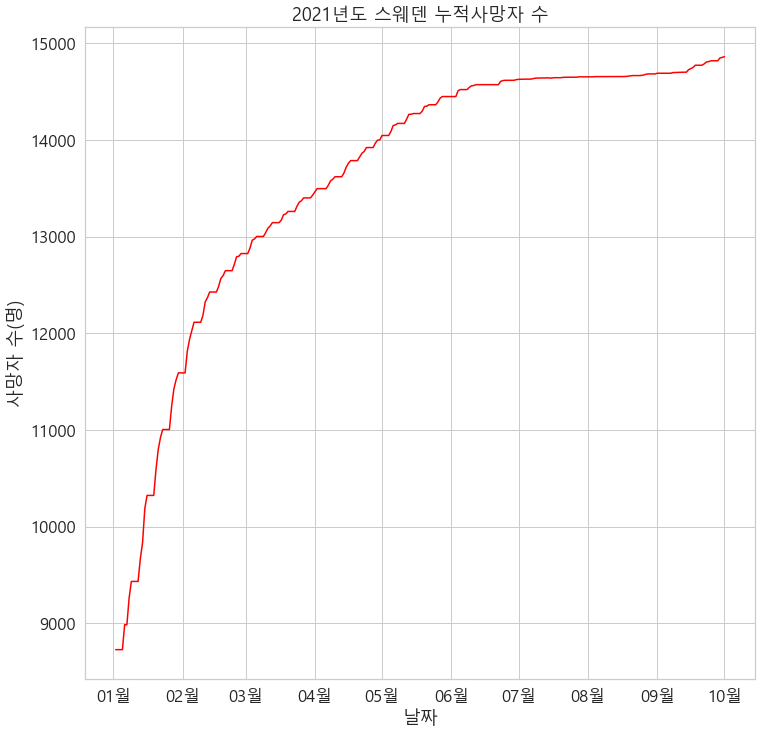

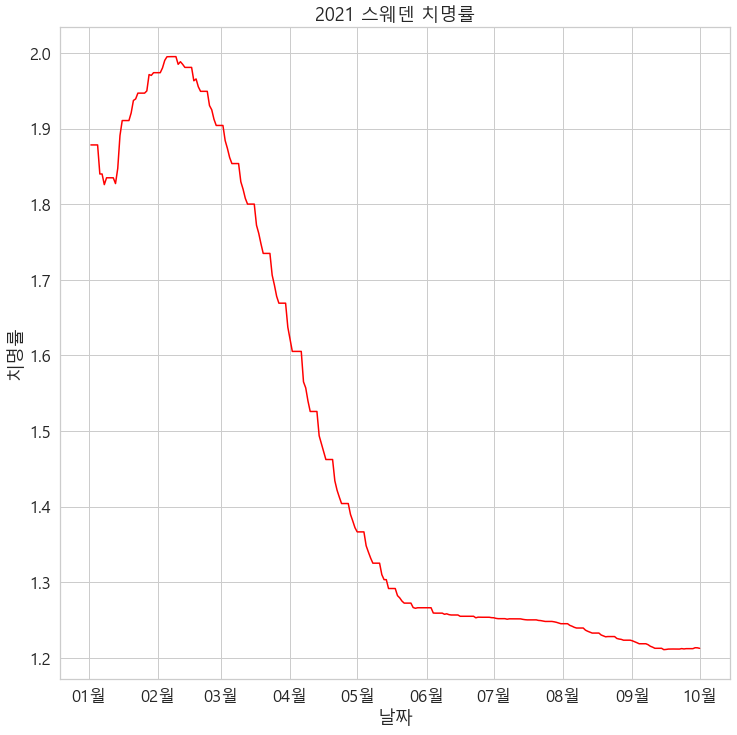

In [84]:
swd.head()

swd_sum = sum_of_dates(swd)
swd['Case_Fatality_Ratio'] = swd['Case_Fatality_Ratio'].astype('float64')
swd_mean = swd.groupby(swd.index.values).mean()

draw_lineplot(swd_sum, "Confirmed" , "확진자 수(백만)", "2021년도 스웨덴 누적확진자 수", "red")
draw_lineplot(swd_sum, "Deaths" , "사망자 수(명)", "2021년도 스웨덴 누적사망자 수", "red")
draw_lineplot(swd_mean, "Case_Fatality_Ratio", "치명률", "2021 스웨덴 치명률", "red")

<ipython-input-87-caa78079f9df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aust['Case_Fatality_Ratio'] = aust['Case_Fatality_Ratio'].astype('float64')


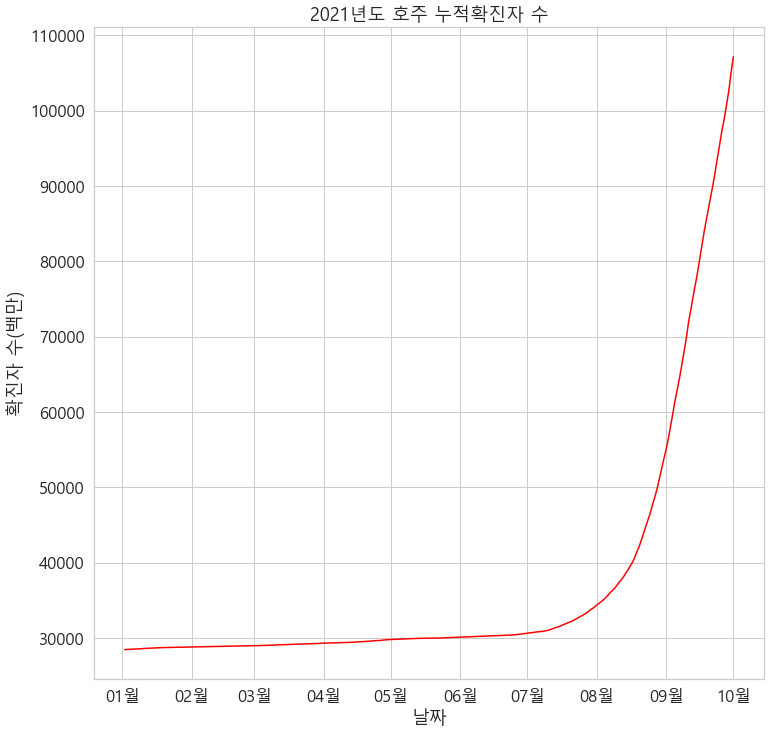

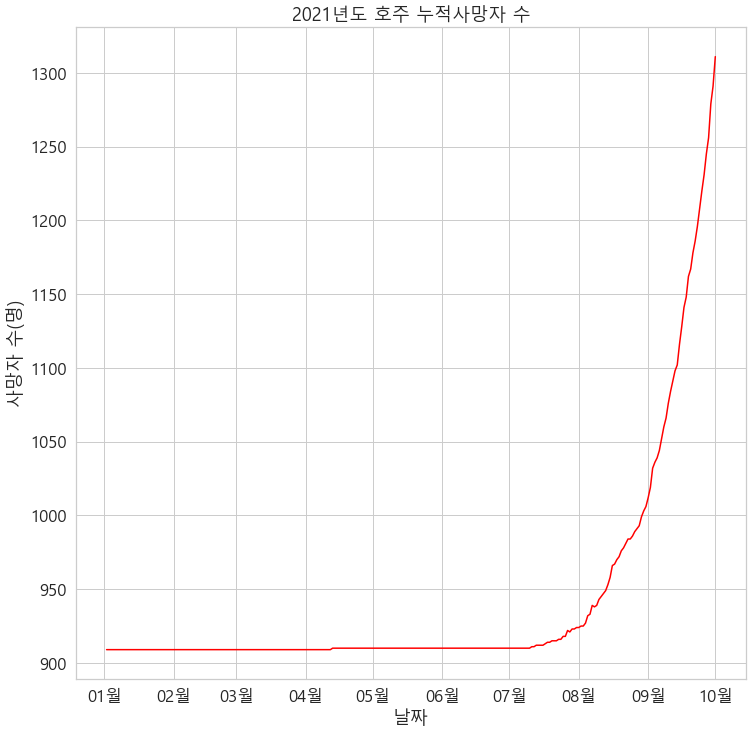

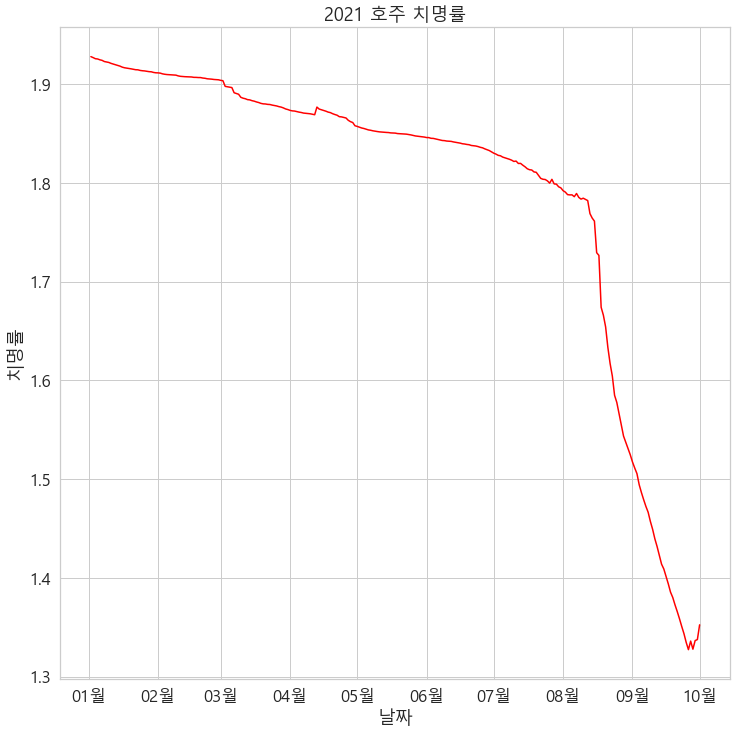

In [87]:
aust_sum = sum_of_dates(aust)
aust['Case_Fatality_Ratio'] = aust['Case_Fatality_Ratio'].astype('float64')
aust_mean = aust.groupby(aust.index.values).mean()

draw_lineplot(aust_sum, "Confirmed" , "확진자 수(백만)", "2021년도 호주 누적확진자 수", "red")
draw_lineplot(aust_sum, "Deaths" , "사망자 수(명)", "2021년도 호주 누적사망자 수", "red")
draw_lineplot(aust_mean, "Case_Fatality_Ratio", "치명률", "2021 호주 치명률", "red")